## Linear Regression
### Name: Benj McMullin
### Class: Math 403
### Section: I don't know
### Date: 11/28/2023

In [5]:
import numpy as np
import pandas as pd
import time
import statsmodels.api as sm
from sklearn import linear_model
from itertools import combinations
from matplotlib import pyplot as plt
import scipy.linalg as la

## Problem 1
Write a function that takes as input $X$ and **y** as defined on page 1. Call this function **ols**. This function should return the least squares estimator for $\beta$ as a numpy array.

In [18]:
def ols(X, y):
    """
    Solves for the least squares estimator.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpyarray
    """
    # Add column of ones on the left
    if len(X.shape) == 1:
        n, d = X.shape[0], 1
    else: n, d = X.shape
    
    
    # Add column of ones on the left
    X_new = np.hstack((np.ones(n).reshape(-1, 1), X.reshape(n, d)))
    
    # Solve for beta
    B = (np.linalg.inv(X_new.T @ X_new)) @ X_new.T @ y
    return B

## Problem 2
Find the least squares estimator for $\beta$ using this random data. 
Produce a plot showing the random data and the line of best fit determined by the least squares estimator for $\beta$. 
Your plot should include a title, axis labels, and a legend. 

In [19]:
# Generate data

# Number of data points
n = 100 

# X values
X = np.arange(100) 

# Add random noise
noise = np.random.uniform(-10, 10, size=(100,)) 

# True relationship
y = .3 * X + 3 + noise

# Find the least squares estimator
B = ols(X, y)

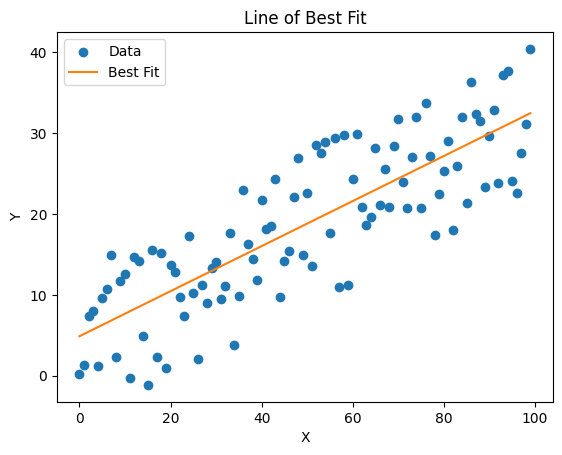

In [20]:
# Plot the data and the best fit line
plt.scatter(X, y, label = 'Data')
plt.plot(X, B[1] * X + B[0], color = 'tab:orange', label = 'Best Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line of Best Fit')
plt.legend()
plt.show()

## Problem 3
Write a function that finds the least squares estimator for rank-deficient models using the SVD. 
The function should still take $X$ and **y** as inputs. Call the function **svd_ols** and return the least squares estimator for $\beta$ as a numpy array.

In [21]:
def svd_ols(X, y):
    """
    Solves for the least squares estimator using the SVD.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpy array
    """
    # Add column of ones on the left
    if len(X.shape) == 1:
        n, d = X.shape[0], 1
    else: n, d = X.shape
    
    # Add column of ones on the left
    X_new = np.hstack((np.ones(n).reshape(n, -1), X.reshape(n, d)))
    
    # SVD
    U, E, V = la.svd(X_new, full_matrices = False)
    
    # Solve for beta
    B = V.T @ np.diag(1 / E) @ U.T @ y
    return B

## Problem 4
Use your function **svd_ols** to find the least squares estimator for a cubic polynomial. 
Create a plot that shows a scatter plot of the data and a curve using the least squares estimator. 
Your plot should include a title, axis labels, and a legend.

In [22]:
# Generate data
x = np.linspace(-4, 2, 500)
y = x ** 3 + 3 * x ** 2 - x - 3.5

# Creat random noise
noise = np.random.normal(0, 3, len(y)) 
# Add noise
y += noise 

# Use vandermonde matrix to fit a cubic polynomial
X = np.vander(x, 4, increasing = True)
# Find the least squares estimator
B = svd_ols(X[:, 1:], y)

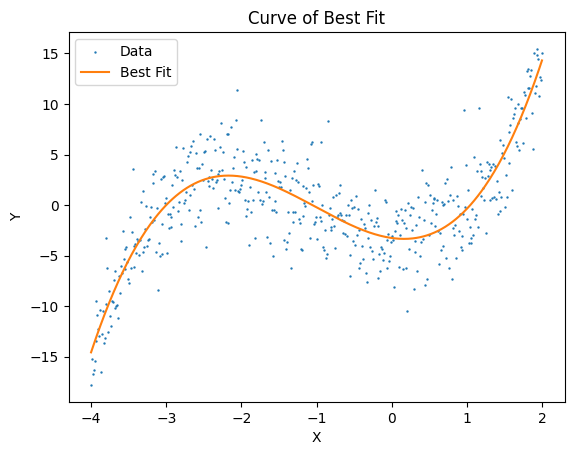

In [23]:
# Plot the data and the best fit curve
plt.scatter(x, y, s = 0.5, label = 'Data')
plt.plot(x, X @ B, color = 'tab:orange', label = 'Best Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curve of Best Fit')
plt.legend()
plt.show()

## Problem 5
The file **realestate.csv** contains transaction data from 2012-2013. 
It has columns for transaction data, house age, distance to nearest MRT station, number of convenience stores, latitude, longitude, and house price of unit area.
Each row in the array is a separate measurement.

Find the combination of variables that builds the model with the best $R^2$ value when predicting **house price of unit area**. Use statsmodels to build each model and calculate $R^2$. Use **statsmodels** to build each model and calculate $R^2$. Using the same combination of variables, time the methods **ols**, **svd_ols**, and **statsmodels** . Return a list with the first element being a tuple of times for each method and the second element being the best $R^2$ value from the first part of the problem.

In [46]:
def problem5():
    """
    Find the best R2 value using statsmodels.
    Then time ols, svd_ols, and statsmodlels.
    Returns:
        list(): a tuple of times and the best R2 value
    """
    # Read in data
    real_estate = pd.read_csv('realestate.csv', index_col = 0)
    y = real_estate['Y house price of unit area']
    
    # init lists to record r2 values and combos
    R_squared = []
    both = []
    # init lists to record times
    OLS_times = []
    SVD_times = []
    STATS_times = []
    
    # loop through all possible combinations of columns
    for n in range(1, 7):
        for combo in combinations(real_estate.columns[:-1], n):
            # create x and add constant
            x = real_estate[[col for col in combo]]
            X = sm.add_constant(x)
            
            # time ols
            start = time.time()
            ols(x.values, y.values)
            OLS_times.append(time.time() - start)
            
            # time svd
            start = time.time()
            svd_ols(x.values, y.values)
            SVD_times.append(time.time() - start)
            
            # time statsmodels
            start = time.time()
            model = sm.OLS(y, X).fit()
            STATS_times.append(time.time() - start)
            
            # record r2 and combo
            R_squared.append(model.rsquared)
            both.append(combo)
            
    # find best r2 and corresponding combo
    bestind = np.argmax(R_squared)
    best_combo = both[bestind]
    
    return [(OLS_times[bestind], SVD_times[bestind], STATS_times[bestind]), max(R_squared)]

In [47]:
problem5()

[(0.0009984970092773438, 0.0, 0.0010018348693847656), 0.582370447272308]

## Problem 6
Use the file **realestate.csv** and the Python Example on page 4 as a template for constructing **y** and $X$ and calculating model AIC and BIC. 
For the dependent variable, use **house price of unit area**. 
For the independent variables, use **distance to the nearest MRT station**, **number of convenience stores**, **latitude**, and **longitude**.

Find the model that has the lowest AIC and the model that has the lowest BIC. Are they the same model? Print the features of the model with the lowest AIC as a list.

In [26]:
# Read in data and set up X and y
real_estate = pd.read_csv('realestate.csv', index_col = 0)
y = real_estate['Y house price of unit area']

# Initialize variables for best AIC, BIC, and combo of both
AIC = []
BIC = []
both = []

# Loop through all combinations of 1-4 variables 
for n in range(1, 5):
    for combo in combinations(real_estate.columns[2:6], n):
        # Make X and add constant
        x = real_estate[[col for col in combo]]
        X = sm.add_constant(x)
        
        # Fit model and append AIC, BIC, and combo
        model = sm.OLS(y, X).fit() 
        AIC.append(model.aic)
        BIC.append(model.bic)
        both.append(combo)

In [30]:
#find indices of best aic and bic
AIC_index = np.argmin(AIC)
BIC_index = np.argmin(BIC)
print('Best AIC is,', min(AIC),'with combo', both[AIC_index])
print('Best BIC is',min(BIC),'with combo', both[BIC_index])
print(f'Best combo of both is\n', both[np.argmin(np.array(AIC) + np.array(BIC))], '\nwhich is the same as the best BIC and AIC')

Best AIC is, 3038.536259321833 with combo ('X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude')
Best BIC is 3054.639723217134 with combo ('X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude')
Best combo of both is
 ('X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude') 
which is the same as the best BIC and AIC


## Problem 7
Use Ridge and Lasso Regression to model **house price of unit area** from the file **realestate.csv**.
Before fitting each model, run a GridSearch on $\alpha$ to find the optimal value.
Then use the optimal $\alpha$ to fit the model.
Once you have fit the model, you can use the **score** method to get $R^2$. 
Print $R^2$ for each model as a tuple. 

In [25]:
# Read in data
real_estate = pd.read_csv('realestate.csv', index_col = 0)

# Split into X and y
y = real_estate['Y house price of unit area']
X = real_estate[real_estate.columns[:-1]]

# Fit and score OLS, print results
# Range for grid search
regression = linear_model.RidgeCV(alphas = np.logspace(-6, 6, 13)) 

# Fit the model
regression.fit(X, y) 

# Best parameter value
print('Best Ridge Alpha:', regression.alpha_) 
print('Ridge Score:', regression.score(X, y), '\n')

# Fit and score Lasso, print results
# Range for grid search
lasso = linear_model.LassoCV(alphas = np.logspace(-6, 6, 13)) 

# Fit the model
lasso.fit(X, y)

# Best parameter value
print('Best Lasso Alpha:', lasso.alpha_) 
print('Lasso Score:', lasso.score(X, y))

Best Ridge Alpha: 0.001
Ridge Score: 0.5823545728167563 

Best Lasso Alpha: 0.001
Lasso Score: 0.5822617746793002
